In [16]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [17]:
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/" #ruta de Carga de los datos
filename = "dataframe_concatenado.csv" #Nombre del archivo a cargar

In [18]:
data = pd.read_csv(mainpath+filename, sep=",")
dummy_df = pd.get_dummies(data, columns=['Seizure'])
dummy_df

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF,Seizure_0,Seizure_1,Seizure_2
0,-29.83,2022-07-01 13:25:21.280,680,148.360312,91,1.476621,23,53.488372,3341.061704,5328.681774,28221.219083,1.594907,0,0,1
1,-111.04,2022-07-01 13:25:10.500,664,194.773965,90,1.206969,23,57.500000,1405.554118,1806.423996,7091.854690,1.285204,0,0,1
2,-95.33,2022-07-01 13:25:16.140,832,184.431592,90,1.531681,22,52.380952,2312.004702,4062.403791,20176.263778,1.757091,0,0,1
3,250.32,2022-07-01 13:25:07.140,656,197.497749,89,1.136568,26,65.000000,784.287901,1629.490612,4862.066247,2.077669,0,0,1
4,155.67,2022-07-01 13:25:21.020,680,148.360312,91,1.496815,23,53.488372,3224.521574,5171.380043,27419.724444,1.603767,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55465,21.31,2022-07-02 02:17:01.250,1065,0.000000,53,0.000000,0,0.000000,4952.636478,21698.600327,182813.669515,4.381222,1,0,0
55466,189.18,2022-07-02 02:16:55.150,975,0.000000,53,0.000000,0,0.000000,4752.324507,19376.395447,180128.880924,4.077246,1,0,0
55467,-370.90,2022-07-02 02:16:51.100,965,251.857703,52,0.000000,8,42.105263,4648.755726,18230.284268,163606.994916,3.921541,1,0,0
55468,-9.60,2022-07-02 02:16:18.300,990,391.396444,56,1.295545,7,41.176471,8546.464800,10778.759849,81108.182128,1.261195,1,0,0


Tamaño de muestras preictales :18500


(array([18500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

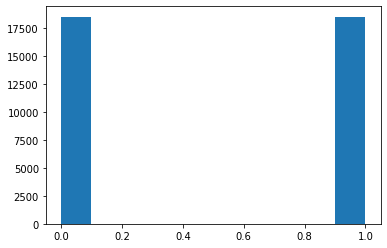

In [19]:
#Igualar muestras
sample_size = dummy_df[dummy_df["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :"+ str(sample_size))

preictal = dummy_df[dummy_df["Seizure_1"] == 1]
other = dummy_df[dummy_df["Seizure_1"] == 0]

preictal_data = preictal.sample(n= sample_size)
other_data = other.sample(n= sample_size)
    
Sample = pd.concat([preictal_data, other_data], axis = 0)

plt.hist(Sample["Seizure_1"])

In [20]:
# Importando las bibliotecas necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler  # <-- Importando el escalador

# Suponiendo que X es tu matriz de características y y es tu vector objetivo

X = Sample[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF_HF']]
y = Sample['Seizure_1']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
# Esto es útil para evaluar cómo se desempeñará tu modelo en datos no vistos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando y aplicando el escalador a los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # <-- Escalando los datos de entrenamiento
X_test = scaler.transform(X_test)  # <-- Escalando los datos de prueba usando la misma transformación

# Inicializando el modelo de regresión logística
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Entrenando el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Prediciendo las etiquetas para los datos de prueba
y_pred = logreg.predict(X_test)

# Evaluando el rendimiento del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Si deseas obtener las probabilidades en lugar de las clases directamente
# y_prob = logreg.predict_proba(X_test)
# La salida será una matriz de dos columnas. La primera columna es la probabilidad de la clase 0
# y la segunda columna es la probabilidad de la clase 1.


Precisión: 0.5739189189189189
              precision    recall  f1-score   support

           0       0.57      0.65      0.60      3721
           1       0.58      0.50      0.54      3679

    accuracy                           0.57      7400
   macro avg       0.58      0.57      0.57      7400
weighted avg       0.58      0.57      0.57      7400



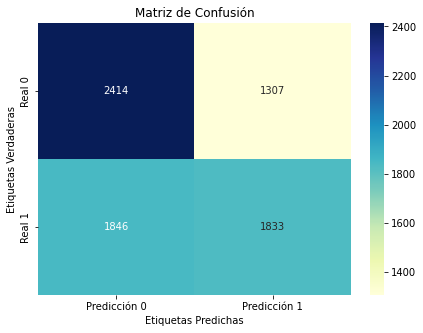

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Convertir la matriz de confusión a DataFrame para etiquetar fácilmente los ejes
cm_df = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predicción 0', 'Predicción 1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="g")  # fmt="g" para evitar notación científica
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()

Para realizar un tuning de hiperparámetros, `GridSearchCV` es una herramienta muy útil. Básicamente, busca a través de una especificación predefinida de hiperparámetros y utiliza validación cruzada. Al final, selecciona la combinación que proporciona el mejor rendimiento.

Primero, definamos la grilla de hiperparámetros que queremos probar:

1. **C**: Inverso de la fuerza de regularización. Debe ser un valor flotante positivo. Valores más pequeños especifican una regularización más fuerte.
2. **penalty**: Usado para especificar la norma utilizada en la penalización. Los valores posibles son: 'l1', 'l2', 'elasticnet', etc.
3. **solver**: Algoritmo a usar en el problema de optimización. Los posibles solvers que podrías considerar incluyen: 'newton-cg', 'lbfgs', 'liblinear', 'sag', y 'saga'.

In [14]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de hiperparámetros
param_grids = [
    {
        'C': np.logspace(-4, 4, 10),
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    {
        'C': np.logspace(-4, 4, 10),
        'penalty': ['l1', 'l2'],
        'solver': ['saga']
    },
    {
        'C': np.logspace(-4, 4, 10),
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': np.linspace(0.1, 0.9, 9)  # valores entre 0 y 1
    }
]

# Crearemos un mejor estimador y un mejor score inicial para ir comparando
best_estimator = None
best_score = 0

# Ahora ejecutaremos la búsqueda en cuadrícula para cada conjunto de parámetros
for param_grid in param_grids:
    grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_estimator = grid_search.best_estimator_

# Usaremos el mejor modelo para predecir
y_pred = best_estimator.predict(X_test)

# Evaluación del rendimiento del modelo
print("Mejor Estimador:", best_estimator)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Mejor Estimador: LogisticRegression(C=0.005994842503189409, l1_ratio=0.5, max_iter=10000,
                   penalty='elasticnet', solver='saga')
Precisión: 0.5845945945945946
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      3721
           1       0.60      0.50      0.55      3679

    accuracy                           0.58      7400
   macro avg       0.59      0.58      0.58      7400
weighted avg       0.59      0.58      0.58      7400



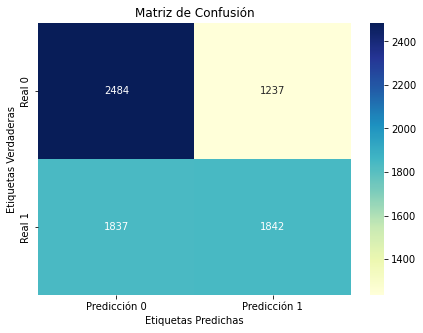

In [15]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Convertir la matriz de confusión a DataFrame para etiquetar fácilmente los ejes
cm_df = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predicción 0', 'Predicción 1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="g")  # fmt="g" para evitar notación científica
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()